In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import Lasso, Ridge, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/car/scout_carV2.json')

In [9]:
df.head()

,make_model,body_type,price,vat,km,hp,Type,Previous Owners,First Registration,Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,Consumption_Comb,Consumption_City,Consumption_Country,Upholstery_Cloth,Upholstery_Color
0,Audi A1,Sedans,15770,VAT deductible,56013.0,66,Used,2,2016,Black,Metallic,5,5,Automatic,1422,3,1220,front,Diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7,3.8,4.3,3.5,Cloth,Black
1,Audi A1,Sedans,14500,Price negotiable,80000.0,141,Used,1,2017,Red,Metallic,3,4,Automatic,1798,4,1255,front,Gasoline,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7,5.6,7.1,4.7,Cloth,Grey
2,Audi A1,Sedans,14640,VAT deductible,83450.0,85,Used,1,2016,Black,Metallic,5,4,Automatic,1598,3,1220,front,Diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7,3.8,4.4,3.4,Cloth,Black
3,Audi A1,Sedans,14500,VAT deductible,73000.0,66,Used,1,2016,Brown,Metallic,3,4,Automatic,1422,3,1195,front,Diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6,3.8,4.3,3.5,Cloth,Black
4,Audi A1,Sedans,16790,VAT deductible,16200.0,66,Used,1,2016,Black,Metallic,5,5,Automatic,1422,3,1220,front,Diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7,4.1,4.6,3.8,Cloth,Black


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14490 entries, 0 to 14489
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             14490 non-null  object 
 1   body_type              14490 non-null  object 
 2   price                  14490 non-null  int64  
 3   vat                    14490 non-null  object 
 4   km                     14490 non-null  float64
 5   hp                     14490 non-null  int64  
 6   Type                   14490 non-null  object 
 7   Previous Owners        14490 non-null  int64  
 8   First Registration     14490 non-null  int64  
 9   Body Color             14490 non-null  object 
 10  Paint Type             14490 non-null  object 
 11  Nr. of Doors           14490 non-null  int64  
 12  Nr. of Seats           14490 non-null  int64  
 13  Gearing Type           14490 non-null  object 
 14  Displacement           14490 non-null  int64  
 15  Cy

# Engineering

In [6]:
df["make_model"].str.get_dummies(",")

,Audi A1,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
14485,0,0,0,0,0,0,0,1
14486,0,0,0,0,0,0,0,1
14487,0,0,0,0,0,0,0,1
14488,0,0,0,0,0,0,0,1


In [ ]:
#for i in df.columns:
#  if df[i].dtypes == "O":
#    df[i] = df[i].str.get_dummies(",")
#  else:
#    pass

In [7]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013,80000,83450,73000,16200
hp,66,141,85,66,66
Type,Used,Used,Used,Used,Used
Previous Owners,2,1,1,1,1
First Registration,2016,2017,2016,2016,2016
Body Color,Black,Red,Black,Brown,Black


In [8]:
df.shape

(14490, 31)

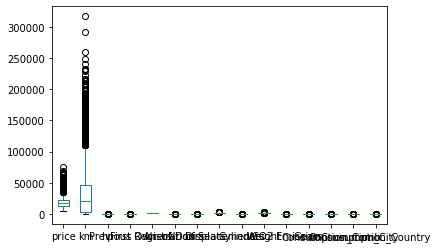

In [9]:
df.plot(kind="box")

In [10]:
df["Comfort & Convenience"].str.get_dummies(",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14485,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0
14486,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
14487,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
14488,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0


In [11]:
df["Emission Class"].value_counts()

Euro 6          11981
Euro 6d-TEMP     2204
Euro 6c           125
Euro 5             78
Euro 6d            61
Euro 4             41
Name: Emission Class, dtype: int64

In [ ]:
df.groupby(["Emission Class"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Emission Class,,,,,,,,
Euro 4,41.0,13615.439024,3926.903093,9400.0,11900.0,13189.0,14399.00,35750.0
Euro 5,78.0,12472.500000,4527.424215,5970.0,8500.0,11700.0,14997.50,30980.0
Euro 6,11981.0,17406.507136,6955.588533,4950.0,12590.0,16490.0,21000.00,74600.0
Euro 6c,125.0,16275.456000,7878.123295,7499.0,11050.0,12950.0,18087.00,41899.0
Euro 6d,61.0,18627.836066,9546.196342,9490.0,10964.0,15990.0,21590.00,43800.0
Euro 6d-TEMP,2204.0,22412.813521,8308.826188,6450.0,16080.0,21949.0,27151.75,62900.0


In [ ]:
pd.get_dummies(df.drop(["Comfort & Convenience", "Entertainment & Media", "Extras", "Safety & Security" ], axis=1), drop_first=True)

,price,km,hp,Previous Owners,First Registration,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears,Consumption_Comb,Consumption_City,Consumption_Country,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's,Type_New,Type_Pre-registered,Type_Used,Body Color_Black,Body Color_Blue,Body Color_Bronze,Body Color_Brown,Body Color_Gold,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Perl_effect,Paint Type_Uni/basic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Electric,Fuel_Electric/Gasoline,Fuel_Gasoline,Fuel_LPG,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Euro 6c,Emission Class_Euro 6d,Emission Class_Euro 6d-TEMP,Upholstery_Cloth_Full leather,Upholstery_Cloth_Other,Upholstery_Cloth_Part leather,Upholstery_Cloth_Velour,Upholstery_Cloth_alcantara,Upholstery_Color_Black,Upholstery_Color_Blue,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Orange,Upholstery_Color_Other,Upholstery_Color_Red,Upholstery_Color_White,Upholstery_Color_Yellow
0,15770,56013.0,66,2,2016,5,5,1422,3,1220,99,7,3.8,4.3,3.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500,80000.0,141,1,2017,3,4,1798,4,1255,129,7,5.6,7.1,4.7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640,83450.0,85,1,2016,5,4,1598,3,1220,99,7,3.8,4.4,3.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500,73000.0,66,1,2016,3,4,1422,3,1195,99,6,3.8,4.3,3.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16790,16200.0,66,1,2016,5,5,1422,3,1220,109,7,4.1,4.6,3.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14485,39950,1000.0,165,1,2019,5,7,1798,4,1685,153,6,6.8,8.7,5.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
14486,39950,0.0,147,0,2019,5,5,1997,4,1758,139,6,5.3,6.2,4.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
14487,39885,9900.0,165,1,2019,5,5,1798,4,1708,168,7,7.4,9.2,6.3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14488,39875,15.0,146,1,2019,5,7,1997,4,1734,139,6,5.3,6.2,4.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


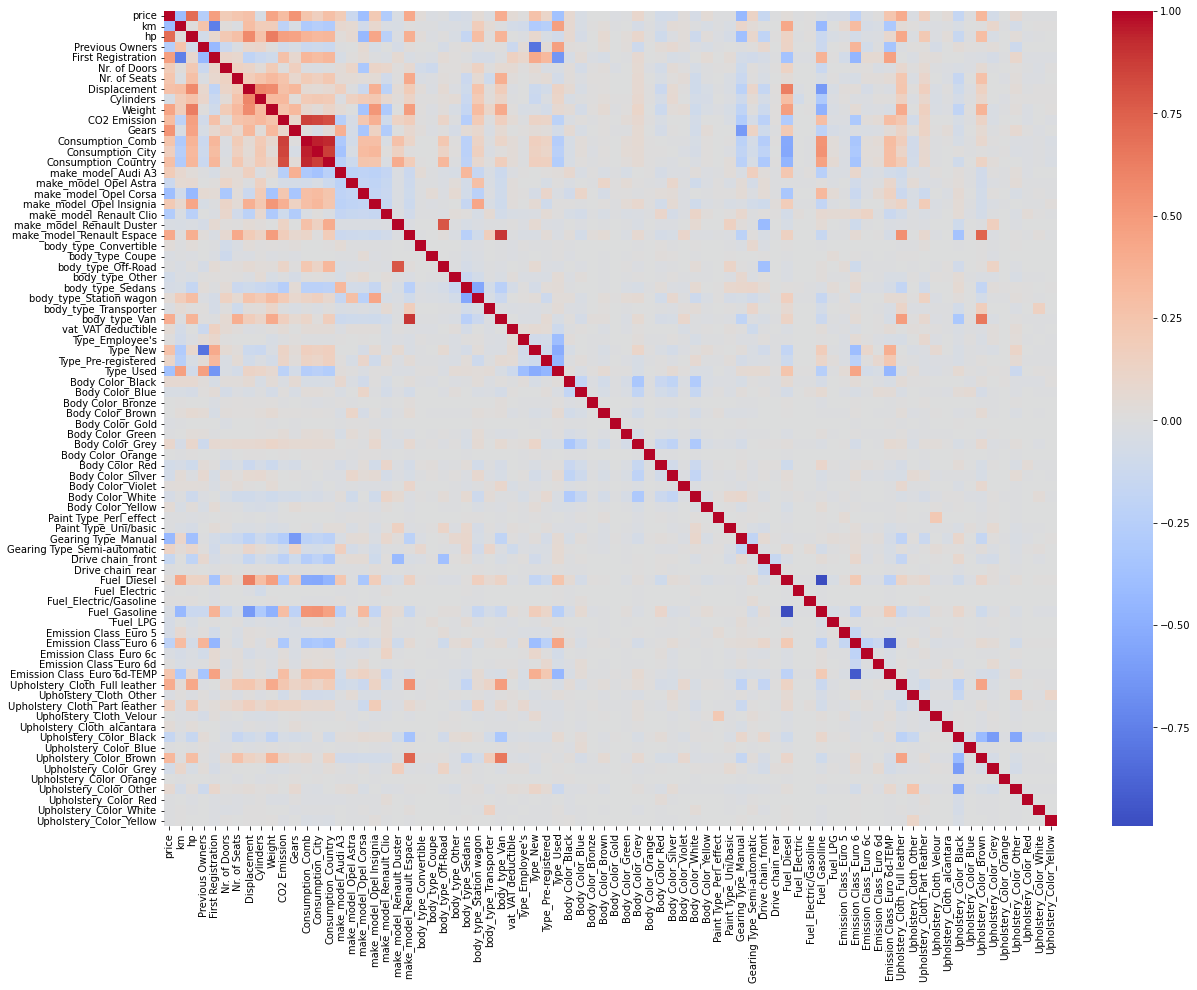

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(pd.get_dummies(df.drop(["Comfort & Convenience", "Entertainment & Media", "Extras", "Safety & Security" ], axis=1), drop_first=True).corr(), cmap="coolwarm")

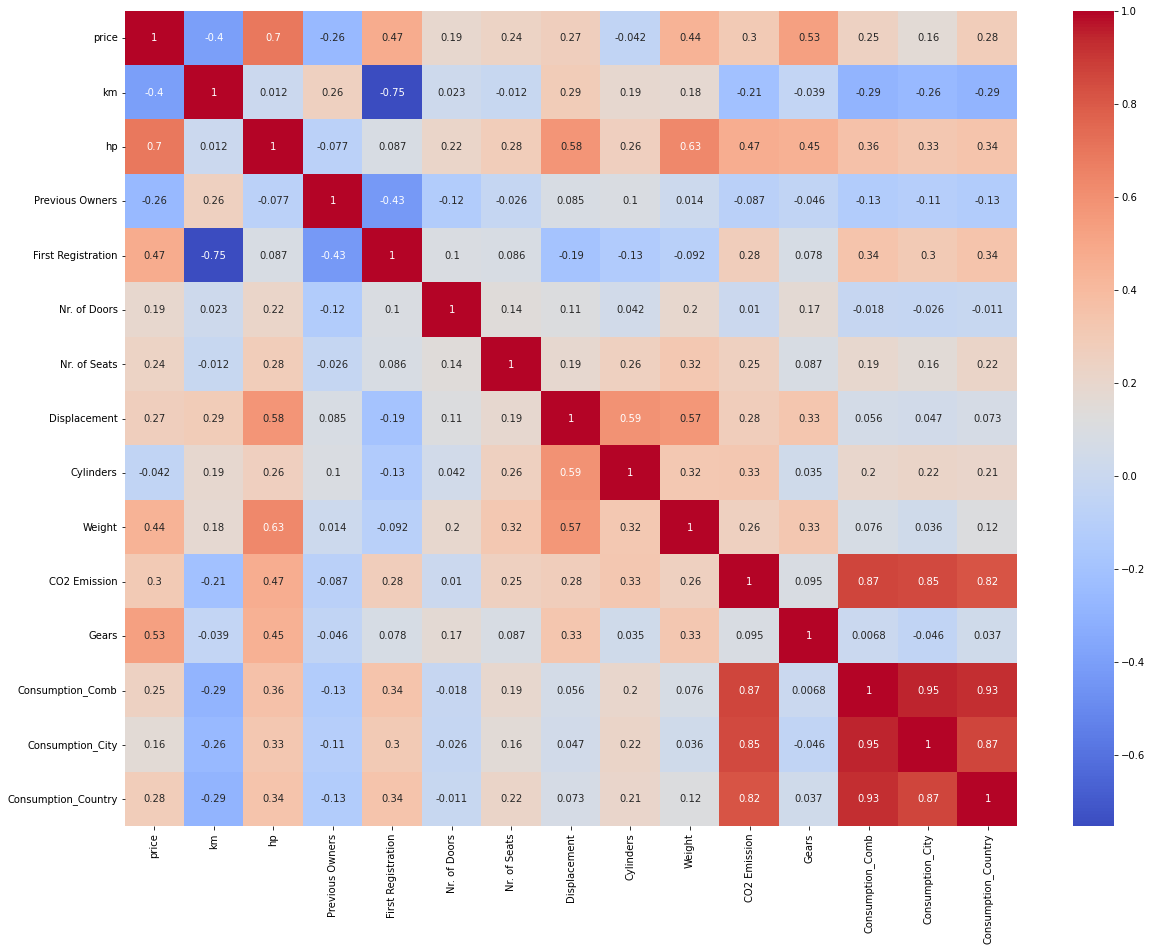

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [ ]:
#sns.pairplot(df)

In [ ]:
pd.merge(left= df, right=df["Comfort & Convenience"].str.get_dummies(","), how="outer", left_index=True, right_index=True)

,make_model,body_type,price,vat,km,hp,Type,Previous Owners,First Registration,Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,Consumption_Comb,Consumption_City,Consumption_Country,Upholstery_Cloth,Upholstery_Color,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,Audi A1,Sedans,15770,VAT deductible,56013.0,66,Used,2,2016,Black,Metallic,5,5,Automatic,1422,3,1220,front,Diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7,3.8,4.3,3.5,Cloth,Black,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,Audi A1,Sedans,14500,Price negotiable,80000.0,141,Used,1,2017,Red,Metallic,3,4,Automatic,1798,4,1255,front,Gasoline,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7,5.6,7.1,4.7,Cloth,Grey,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,Audi A1,Sedans,14640,VAT deductible,83450.0,85,Used,1,2016,Black,Metallic,5,4,Automatic,1598,3,1220,front,Diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7,3.8,4.4,3.4,Cloth,Black,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,Audi A1,Sedans,14500,VAT deductible,73000.0,66,Used,1,2016,Brown,Metallic,3,4,Automatic,1422,3,1195,front,Diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6,3.8,4.3,3.5,Cloth,Black,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,Audi A1,Sedans,16790,VAT deductible,16200.0,66,Used,1,2016,Black,Metallic,5,5,Automatic,1422,3,1220,front,Diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7,4.1,4.6,3.8,Cloth,Black,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14485,Renault Espace,Van,39950,VAT deductible,1000.0,165,Demonstration,1,2019,White,Metallic,5,7,Automatic,1798,4,1685,front,Gasoline,153,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport suspens...","ABS,Adaptive Cruise Control,Blind spot monitor...",6,6.8,8.7,5.7,Full leather,Brown,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0
14486,Renault Espace,Van,39950,V

In [11]:


for i in ["Comfort & Convenience", "Entertainment & Media", "Extras", "Safety & Security" ]:
  df = pd.merge(left= df, right=df[i].str.get_dummies(","), how="outer", left_index=True, right_index=True)

In [12]:
df.shape

(14490, 125)

In [ ]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013,80000,83450,73000,16200
...,...,...,...,...,...
Side airbag,1,1,1,1,1
Tire pressure monitoring system,1,1,1,1,1
Traction control,1,1,1,0,1
Traffic sign recognition,0,0,0,0,0


In [13]:
df = pd.get_dummies(df.drop(["Comfort & Convenience", "Entertainment & Media", "Extras", "Safety & Security" ], axis=1), drop_first=True)

In [22]:
df

,price,km,hp,Previous Owners,First Registration,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears,Consumption_Comb,Consumption_City,Consumption_Country,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,...,Body Color_Brown,Body Color_Gold,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Perl_effect,Paint Type_Uni/basic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Electric,Fuel_Electric/Gasoline,Fuel_Gasoline,Fuel_LPG,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Euro 6c,Emission Class_Euro 6d,Emission Class_Euro 6d-TEMP,Upholstery_Cloth_Full leather,Upholstery_Cloth_Other,Upholstery_Cloth_Part leather,Upholstery_Cloth_Velour,Upholstery_Cloth_alcantara,Upholstery_Color_Black,Upholstery_Color_Blue,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Orange,Upholstery_Color_Other,Upholstery_Color_Red,Upholstery_Color_White,Upholstery_Color_Yellow
0,15770,56013.0,66,2,2016,5,5,1422,3,1220,99,7,3.8,4.3,3.5,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500,80000.0,141,1,2017,3,4,1798,4,1255,129,7,5.6,7.1,4.7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640,83450.0,85,1,2016,5,4,1598,3,1220,99,7,3.8,4.4,3.4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500,73000.0,66,1,2016,3,4,1422,3,1195,99,6,3.8,4.3,3.5,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16790,16200.0,66,1,2016,5,5,1422,3,1220,109,7,4.1,4.6,3.8,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14485,39950,1000.0,165,1,2019,5,7,1798,4,1685,153,6,6.8,8.7,5.7,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
14486,39950,0.0,147,0,2019,5,5,1997,4,1758,139,6,5.3,6.2,4.7,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
14487,39885,9900.0,165,1,2019,5,5,1798,4,1708,168,7,7.4,9.2,6.3,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14488,39875,15.0,146,1,2019,5,7,1997,4,1734,139,6,5.3,6.2,4.7,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
[i for i in df.columns]

# train test split


In [14]:
X = df.drop("price", axis=1)
y = df["price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [16]:
X_train.shape

(9708, 171)

In [17]:
y_train.shape

(9708,)

# model

In [18]:
xg_regressor = XGBRegressor(objective='reg:squarederror',random_state=22)

xg_regressor.fit(X_train,y_train)

XGBRegressor(objective='reg:squarederror', random_state=22)

In [19]:
r2_score(y_test, xg_regressor.predict(X_test))

0.9347085322598461

In [20]:
mean_squared_error(y_test, xg_regressor.predict(X_test))

3795349.3900786783

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
r2_score(y_test, regressor.predict(X_test))

0.8920893078226018

In [23]:
regressor.intercept_

-2964999.661711936

In [24]:
cross_validate(regressor, X, y, cv=20, return_train_score=True)

{'fit_time': array([0.18760824, 0.24206114, 0.22954845, 0.22529793, 0.23439765,
        0.20890832, 0.2283659 , 0.21866965, 0.23731852, 0.22372961,
        0.2216363 , 0.24226475, 0.21313858, 0.21609092, 0.24419284,
        0.21374798, 0.22352791, 0.22908187, 0.22298121, 0.24472356]),
 'score_time': array([0.01071501, 0.00677466, 0.00666833, 0.01396179, 0.00644135,
        0.0066843 , 0.00764775, 0.00717926, 0.0067265 , 0.0067122 ,
        0.01052547, 0.00671411, 0.00911927, 0.01158142, 0.0070715 ,
        0.01059461, 0.01030111, 0.00674891, 0.01369119, 0.01022434]),
 'test_score': array([ 0.64558351,  0.48086433,  0.70858336,  0.68925749,  0.63702241,
         0.4654749 ,  0.43500836,  0.8909802 ,  0.74807196,  0.84112769,
         0.66647407, -0.07018054,  0.69170924, -1.36748725,  0.54821042,
         0.76532374,  0.69773202,  0.3932707 ,  0.57195332,  0.52411884]),
 'train_score': array([0.89616953, 0.89677336, 0.89518186, 0.89722474, 0.9001001 ,
        0.89601714, 0.89332779, 0.8

In [25]:
cross_validate(xg_regressor, X, y, cv=20, return_train_score=True)

{'fit_time': array([4.59618616, 4.48370337, 4.46222782, 4.50653577, 4.46071291,
        4.42340779, 4.44431019, 4.45611167, 4.42042375, 4.487396  ,
        4.51466918, 4.44838691, 4.55128551, 4.43566728, 4.46584058,
        4.49098587, 4.47879148, 4.48011184, 4.46245193, 4.42718101]),
 'score_time': array([0.00803566, 0.00837588, 0.00777006, 0.00811291, 0.00779653,
        0.0082612 , 0.00808501, 0.00788236, 0.00793934, 0.00824094,
        0.00803804, 0.0080328 , 0.00807714, 0.00822592, 0.00825763,
        0.00810528, 0.00855088, 0.00833488, 0.00794721, 0.00818992]),
 'test_score': array([0.73548011, 0.59533004, 0.73082836, 0.58882888, 0.26895258,
        0.29614771, 0.61078109, 0.93295422, 0.82765149, 0.7677884 ,
        0.64301308, 0.59072629, 0.75030465, 0.03174456, 0.72503951,
        0.85372796, 0.76295141, 0.7577896 , 0.87671945, 0.3284097 ]),
 'train_score': array([0.93721778, 0.93711795, 0.93671641, 0.93839691, 0.93908774,
        0.93875289, 0.93496781, 0.93448338, 0.93605582,

In [26]:
df1 = pd.DataFrame(cross_validate(regressor, X, y, cv=20, return_train_score=True))

In [27]:
df1.mean()

fit_time       0.219731
score_time     0.009468
test_score     0.498155
train_score    0.895541
dtype: float64

In [28]:
df2 = pd.DataFrame(cross_validate(xg_regressor, X, y, cv=20, return_train_score=True))

In [29]:
df2.mean()

fit_time       4.448404
score_time     0.008231
test_score     0.633758
train_score    0.936793
dtype: float64

In [33]:
lasso = Lasso(alpha=100)
lasso.fit(X,y)

Lasso(alpha=100)

In [31]:
lasso.intercept_

-3105300.754596087

In [32]:
abs(lasso.coef_).sum()

16874.831934182264

In [34]:
fold = KFold(n_splits=20, shuffle=True)

In [35]:
df1 = pd.DataFrame(cross_validate(lasso, X, y, cv=fold, n_jobs=-1, return_train_score=True, scoring=['r2', 'neg_mean_squared_error']))

In [36]:
df1.describe()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01
mean,0.226428,0.010042,0.840190,0.841415,-8.781890e+06,-8.728307e+06
std,0.026071,0.002239,0.014776,0.000666,8.744556e+05,3.755082e+04
min,0.185214,0.004285,0.813461,0.840057,-1.076373e+07,-8.788966e+06
25%,0.195336,0.008634,0.831139,0.840992,-9.458977e+06,-8.744628e+06
50%,0.234549,0.010885,0.839017,0.841416,-8.729008e+06,-8.726650e+06
75%,0.245201,0.011399,0.850313,0.841732,-8.196610e+06,-8.707124e+06
max,0.260303,0.014137,0.867065,0.842834,-7.141472e+06,-8.628137e+06


In [37]:
df2 = pd.DataFrame(cross_validate(xg_regressor, X, y, cv=fold, n_jobs=-1, return_train_score=True, scoring=['r2', 'neg_mean_squared_error']))

In [38]:
df2.describe()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01
mean,7.764688,0.014498,0.928480,0.936178,-3.923506e+06,-3.512645e+06
std,0.160459,0.004664,0.006772,0.000784,4.186474e+05,4.268615e+04
min,7.602848,0.012247,0.915471,0.934440,-4.720873e+06,-3.601424e+06
25%,7.660731,0.012917,0.923989,0.935867,-4.150526e+06,-3.541105e+06
50%,7.699106,0.013326,0.930148,0.936094,-4.004081e+06,-3.512750e+06
75%,7.820393,0.013932,0.933485,0.936602,-3.592530e+06,-3.489426e+06
max,8.186859,0.033919,0.938253,0.937612,-3.142322e+06,-3.429855e+06


In [39]:
df3 = pd.DataFrame(cross_validate(regressor, X, y, cv=fold, n_jobs=-1, return_train_score=True, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_percentage_error']))

In [40]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,20.0,3.294908e-01,0.013992,3.072579e-01,3.180369e-01,3.287491e-01,3.373610e-01,3.600786e-01
score_time,20.0,1.027333e-02,0.002673,7.855654e-03,8.451581e-03,9.521127e-03,1.138473e-02,1.927805e-02
test_r2,20.0,8.904101e-01,0.006930,8.789511e-01,8.860979e-01,8.881506e-01,8.944177e-01,9.067440e-01
train_r2,20.0,8.948500e-01,0.000352,8.939948e-01,8.946536e-01,8.949265e-01,8.950789e-01,8.954385e-01
test_neg_mean_squared_error,20.0,-6.020888e+06,440845.259258,-6.819963e+06,-6.367089e+06,-5.963893e+06,-5.792942e+06,-5.244956e+06
train_neg_mean_squared_error,20.0,-5.787335e+06,22374.940874,-5.827078e+06,-5.799072e+06,-5.790575e+06,-5.771445e+06,-5.744341e+06
test_neg_mean_absolute_percentage_error,20.0,-1.021145e-01,0.003802,-1.091337e-01,-1.041965e-01,-1.019174e-01,-9.994841e-02,-9.387040e-02
train_neg_mean_absolute_percentage_error,20.0,-1.005190e-01,0.000169,-1.008985e-01,-1.006091e-01,-1.005228e-01,-1.004179e-01,-1.002609e-01


In [56]:
df3.describe()["test_r2"]["mean"]

0.8904100535839763

In [ ]:
np.sqrt(-((df1["test_neg_mean_squared_error"]).mean()))

2455.936421189577

In [ ]:
np.sqrt(-((df1["test_neg_mean_squared_error"]))).mean()

2451.98207542807

In [52]:
df["price"].min()

4950

In [42]:
# modelin bias'ı var mı?
from sklearn.model_selection import cross_val_predict

In [47]:
y_pred_cv1 = pd.Series(cross_val_predict(regressor, X, y, cv=fold, n_jobs=-1))
y_pred_cv2 = pd.Series(cross_val_predict(lasso, X, y, cv=fold, n_jobs=-1))
y_pred_cv3 = pd.Series(cross_val_predict(xg_regressor, X, y, cv=fold, n_jobs=-1))

In [69]:
((y_pred_cv1 - y)/y).mean()

0.005923767882214535

In [60]:
print("lineer fiyat hata", ((y_pred_cv1 - y)/y).mean())
print("lineer test",df3.describe()["test_r2"]["mean"])
print("lasso fiyat hata", ((y_pred_cv2 - y)/y).mean())
print("lasso test", df1.describe()["test_r2"]["mean"])
print("xg_boost fiyat hata", ((y_pred_cv3 - y)/y).mean())
print("xg_boost test", df2.describe()["test_r2"]["mean"])

lineer fiyat hata 0.005923767882214535
lineer test 0.8904100535839763
lasso fiyat hata 0.01984484619110799
lasso test 0.8401904132890881
xg_boost fiyat hata 0.011677028611302376
xg_boost test 0.9284801219984958


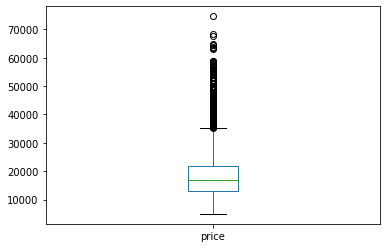

In [ ]:
df["price"].plot(kind="box")

In [ ]:
regressor.fit(X,y)

LinearRegression()

In [ ]:
import joblib

['tahminci.joblib']

In [ ]:
#models = [('LR', LinearRegression()),
#          ("Ridge", Ridge(random_state=22)),
#          ("Lasso", Lasso(random_state=22)),
#          ('KNN', KNeighborsRegressor()),
#          ('CART', DecisionTreeRegressor(random_state=22)),
#          ('RF', RandomForestRegressor(random_state=22)),
#          ('SVR', SVR()),
#          ('GBM', GradientBoostingRegressor(random_state=22)),
#          ("XGBoost", XGBRegressor(objective='reg:squarederror',random_state=22)),
#          ("LightGBM", LGBMRegressor(random_state=22))          
#          ]
#
#for name, regressor in models:
#    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
#    print(f"RMSE: {round(rmse, 4)} ({name}) ")
#    print(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
#

In [ ]:
#cart_params = {'max_depth': range(1, 6),
#               "min_samples_split": range(2, 30)}
#rf_params = {"max_depth": [6, None],
#             "max_features": [5, 7, "auto"],
#             "min_samples_split": [15, 20],
#             "n_estimators": [500, 1000,2000]}
#xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
#                  "max_depth": [5,6],
#                  "n_estimators": [200, 300, 500],
#                  "colsample_bytree": [0.5, 0.7]}
#lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
#                   "n_estimators": [500, 1500],
#                   "colsample_bytree": [0.5, 0.7]}
#regressors = [("CART", DecisionTreeRegressor(random_state=22), cart_params),
#              ("RF", RandomForestRegressor(random_state=22), rf_params),
#              ('XGBoost', XGBRegressor(objective='reg:squarederror',random_state=22), xgboost_params),
#              ('LightGBM', LGBMRegressor(random_state=22), lightgbm_params)]
#best_models = {}
#for name, regressor, params in regressors:
#    print(f"########## {name} ##########")
#    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
#    print(f"RMSE: {round(rmse, 4)} ({name}) ")
#    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
#    final_model = regressor.set_params(**gs_best.best_params_)
#    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))
#    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")
#    print(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))
#    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
#    best_models[name] = final_model

## modeli kullanma

In [ ]:
X.head()

,km,hp,Previous Owners,First Registration,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears,Consumption_Comb,Consumption_City,Consumption_Country,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,...,Body Color_Brown,Body Color_Gold,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Perl_effect,Paint Type_Uni/basic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Electric,Fuel_Electric/Gasoline,Fuel_Gasoline,Fuel_LPG,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Euro 6c,Emission Class_Euro 6d,Emission Class_Euro 6d-TEMP,Upholstery_Cloth_Full leather,Upholstery_Cloth_Other,Upholstery_Cloth_Part leather,Upholstery_Cloth_Velour,Upholstery_Cloth_alcantara,Upholstery_Color_Black,Upholstery_Color_Blue,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Orange,Upholstery_Color_Other,Upholstery_Color_Red,Upholstery_Color_White,Upholstery_Color_Yellow
0,56013.0,66,2,2016,5,5,1422,3,1220,99,7,3.8,4.3,3.5,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,80000.0,141,1,2017,3,4,1798,4,1255,129,7,5.6,7.1,4.7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,83450.0,85,1,2016,5,4,1598,3,1220,99,7,3.8,4.4,3.4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,73000.0,66,1,2016,3,4,1422,3,1195,99,6,3.8,4.3,3.5,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16200.0,66,1,2016,5,5,1422,3,1220,109,7,4.1,4.6,3.8,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
X.head() @ pd.Series(regressor.coef_, index=X.columns) + regressor.intercept_

0    15083.393356
1    19181.716893
2    16533.534950
3    13177.863750
4    16837.970207
dtype: float64

In [ ]:
X.head().assign(bluetooth = 5) #@ pd.Series(regressor.coef_, index=X.columns) + regressor.intercept_

,km,hp,Previous Owners,First Registration,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears,Consumption_Comb,Consumption_City,Consumption_Country,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,...,Body Color_Gold,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Perl_effect,Paint Type_Uni/basic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Electric,Fuel_Electric/Gasoline,Fuel_Gasoline,Fuel_LPG,Emission Class_Euro 5,Emission Class_Euro 6,Emission Class_Euro 6c,Emission Class_Euro 6d,Emission Class_Euro 6d-TEMP,Upholstery_Cloth_Full leather,Upholstery_Cloth_Other,Upholstery_Cloth_Part leather,Upholstery_Cloth_Velour,Upholstery_Cloth_alcantara,Upholstery_Color_Black,Upholstery_Color_Blue,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Orange,Upholstery_Color_Other,Upholstery_Color_Red,Upholstery_Color_White,Upholstery_Color_Yellow,bluetooth
0,56013.0,66,2,2016,5,5,1422,3,1220,99,7,3.8,4.3,3.5,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5
1,80000.0,141,1,2017,3,4,1798,4,1255,129,7,5.6,7.1,4.7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
2,83450.0,85,1,2016,5,4,1598,3,1220,99,7,3.8,4.4,3.4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5
3,73000.0,66,1,2016,3,4,1422,3,1195,99,6,3.8,4.3,3.5,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5
4,16200.0,66,1,2016,5,5,1422,3,1220,109,7,4.1,4.6,3.8,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5


In [ ]:
joblib.dump(regressor, "tahminci.joblib")

In [ ]:
def sayısala_cevir(df):
  if df.dtypes == 

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'Type',
       'Previous Owners', 'First Registration', 'Body Color', 'Paint Type',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'CO2 Emission',
       'Emission Class', 'Comfort & Convenience', 'Entertainment & Media',
       'Extras', 'Safety & Security', 'Gears', 'Consumption_Comb',
       'Consumption_City', 'Consumption_Country', 'Upholstery_Cloth',
       'Upholstery_Color'],
      dtype='object')

In [ ]:
numeric = ['km', 'hp', 'Previous Owners', 'First Registration', 'Nr. of Doors', 'Nr. of Seats', 'Displacement',
       'Cylinders', 'Weight', 'CO2 Emission', 'Gears', 'Consumption_Comb',
       'Consumption_City', 'Consumption_Country']

str_get_dummies = ['Comfort & Convenience', 'Entertainment & Media', 'Extras', 'Safety & Security']

get_dummies = ['make_model', 'Gearing Type', 'Body Color', 'Emission Class', 'Type', 'Upholstery_Cloth', 'Fuel',
 'Drive chain', 'Paint Type', 'Upholstery_Color', 'body_type', 'vat']

all_columns = X.columns.to_list()

In [ ]:
import json

with open("numeric_Columns_in_list.json", "w") as f:
  json.dump(numeric, f)

with open("str_get_dummies_Columns_in_list.json", "w") as f:
  json.dump(str_get_dummies, f)
#
with open("get_dummies_Columns_in_list.json", "w") as f:
  json.dump(get_dummies, f)

with open("All_Column_Names.json", "w") as f:
  json.dump(all_columns, f)

In [ ]:
with open("numeric_Columns_in_list.json", "r") as f:
  NUMERIC = json.load(f)

with open("str_get_dummies_Columns_in_list.json", "r") as f:
  STR_GET_DUMMIES = json.load(f)

with open("get_dummies_Columns_in_list.json", "r") as f:
  GET_DUMMIES = json.load(f)

with open("All_Column_Names.json", "r") as f:
  ALL_COLUMNS = json.load(f)

FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/car/scout_carV2.json'

data = pd.read_json(FILE_PATH)

In [ ]:
def converter(data):
  data[NUMERIC] = data[NUMERIC].astype(float)
  return data[NUMERIC]

def str_get_dummies(data):
  liste = []
  for i in STR_GET_DUMMIES:
    liste.append(data[i].str.get_dummies(","))
  return pd.concat(liste, axis=1)

def get_dummies_(data):
  return pd.get_dummies(data[GET_DUMMIES])

def merge_all(*dataframes):
  return pd.concat(dataframes, axis=1)

def column_injection(data):
  return data.reindex(ALL_COLUMNS, axis=1).fillna(0)

def preprocesing(data):
  part1 = converter(data)
  part2 = str_get_dummies(data)
  part3 = get_dummies_(data)
  merged = merge_all(part1, part2, part3)
  X = column_injection(merged)
  return X

In [ ]:
model = joblib.load("tahminci.joblib")

In [ ]:
sample = pd.read_json(FILE_PATH).head()

In [ ]:
X_sample = preprocesing(sample)

In [ ]:
model.predict(X_sample)

array([15083.39335596, 19181.71689329, 16533.53495007, 13177.8637497 ,
       16837.9702074 ])

In [ ]:
if __name__ == "__main__":
  df = pd.read_json(FILE_PATH)
  model = joblib.load("tahminci.joblib")
  X = preprocesing(df)
  y_pred = model.predict(X)
  pd.Series(y_pred).to_csv("tahminler")

In [ ]:
#X.head().reindex(["a","b","hp"],axis=1)

,a,b,hp
0,NaN,NaN,66
1,NaN,NaN,141
2,NaN,NaN,85
3,NaN,NaN,66
4,NaN,NaN,66
